## Version 3: use all the featrues containing "indfband" (individual, data driven frequency band ranges) and "absmean" (+ the other feautres starting with  and "eyesclosed_fooof_" and the feature eyesclosed_alphapeak_max_freq)

In [1]:
cd ../pipelines

/Users/mathieuchevalley/Documents/Study/ETHZ/Fall Semester 2020/Data Science lab/data_sc_lab/task_01/pipelines


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipynb.fs.full.tool_functions import *
from yellowbrick.regressor import AlphaSelection

Using TensorFlow backend.


In [3]:
df_beha = pd.read_csv('../../../data/Behavioral/AllData.csv')#, nrows=1000)

df_psd_cluster = pd.read_csv("../../../data/EEG/RestingEEG_PSD_Cluster.csv") #, nrows=1000)
df_psd_channel = pd.read_csv("../../../data/EEG/RestingEEG_PSD_Channel.csv") #, nrows=5)
df_spectro_cluster = pd.read_csv("../../../data/EEG/RestingEEG_Spectro_Cluster.csv") #, nrows=1000)
df_spectro_channel = pd.read_csv("../../../data/EEG/RestingEEG_Spectro_Channel.csv") #, nrows=5)

df_microstate = pd.read_csv("../../../data/EEG/RestingEEG_Microstates.csv") #, nrows=5)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (66,68,80,81,82,83,84,95,96,97,98,99,110,111,112,113,114,125,126,127,128,129,140,141,142,144,155,156,157,159,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103

In [4]:
# Extract relevant info from the Behavioral data 
y_labels = df_beha[["Patient_ID", "Age", "DX_01_Cat"]]
y_labels_healthy = y_labels[y_labels["DX_01_Cat"].str.contains("No Diagnosis Given") == True]

y_labels = y_labels[["Patient_ID", "Age"]]
y_labels_healthy = y_labels_healthy[["Patient_ID", "Age"]]
y_labels_healthy

,Patient_ID,Age
9,NDARCF462HNM,14.216632
11,NDARFC233RND,9.153661
22,NDARDT800YVF,17.510381
25,NDARZT011LBZ,7.760209
26,NDARKV482FU9,10.977298
...,...,...
2088,NDARAV069HGT,13.896189
2089,NDARZC497BFU,17.419917
2090,NDARDZ737LG9,13.031143
2094,NDARRT283RHB,10.712069


In [5]:
df_psd_cluster.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_spectro_cluster.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_microstate.rename(columns={'id': 'Patient_ID'}, inplace=True)
print("Original lengths: " + str(len(df_psd_cluster)) + "(psd), " + \
     str(len(df_spectro_cluster)) + "(spectro), " + str(len(df_microstate)) + "(micro)")

# Aggregate with label
df_label_psd_cluster = pd.merge(y_labels_healthy, df_psd_cluster, on='Patient_ID')
df_label_spectro_cluster = pd.merge(y_labels_healthy, df_spectro_cluster, on='Patient_ID')
df_label_microstate = pd.merge(y_labels_healthy, df_microstate, on='Patient_ID')
print("Only healthy people, resulting lengths: " + str(len(df_label_psd_cluster)) + "(psd), " + \
     str(len(df_label_spectro_cluster)) + "(spectro), " + str(len(df_label_microstate)) + "(micro)")

# Drop NaN values
df_label_psd_cluster = fill_with_median(df_label_psd_cluster)
df_label_spectro_cluster = fill_with_median(df_label_spectro_cluster)
df_label_microstate = fill_with_median(df_label_microstate)
print("Replace NaN by median, resulting lenghts: " + str(len(df_label_psd_cluster)) + "(psd), " + \
     str(len(df_label_spectro_cluster)) + "(spectro), " + str(len(df_label_microstate)) + "(micro)")

Original lengths: 1485(psd), 1485(spectro), 1108(micro)
Only healthy people, resulting lengths: 174(psd), 174(spectro), 128(micro)
Replace NaN by median, resulting lenghts: 174(psd), 174(spectro), 128(micro)


In [6]:
test_ratio = 0.2

In [7]:
df_label_spectro_cluster

,Patient_ID,Age,eyesclosed_fband_delta_absmean_lfront,eyesclosed_fband_delta_absmean_mfront,eyesclosed_fband_delta_absmean_rfront,eyesclosed_fband_delta_absmean_lpari,eyesclosed_fband_delta_absmean_mpari,eyesclosed_fband_delta_absmean_rpari,eyesclosed_fband_delta_relmean_lfront,eyesclosed_fband_delta_relmean_mfront,...,eyesopen_fooof_peak_freq_rfront,eyesopen_fooof_peak_freq_lpari,eyesopen_fooof_peak_freq_mpari,eyesopen_fooof_peak_freq_rpari,eyesopen_fooof_peak_amplitude_lfront,eyesopen_fooof_peak_amplitude_mfront,eyesopen_fooof_peak_amplitude_rfront,eyesopen_fooof_peak_amplitude_lpari,eyesopen_fooof_peak_amplitude_mpari,eyesopen_fooof_peak_amplitude_rpari
0,NDARYP516VUU,10.758156,3.736577,5.970049,3.462826,4.225793,6.973617,6.719936,5.615468,6.878523,...,10.750797,10.401234,10.783732,11.046665,0.821805,0.784304,0.770845,0.914380,0.671399,1.004923
1,NDARMW252AJW,14.353639,1.046030,0.993709,0.171848,0.340939,0.820232,1.192685,8.556849,8.801300,...,4.946944,4.752440,11.130275,11.116105,0.482187,0.246096,0.453385,0.387212,0.482681,0.445570
2,NDARNT939YMG,13.436344,0.598047,0.989073,0.653203,0.398997,0.747339,0.464198,6.277626,6.457210,...,9.529512,5.678052,3.952035,3.000000,0.199349,0.215752,0.125818,0.116886,0.130389,0.161801
3,NDARUF935UL3,7.736253,0.393874,2.468602,1.619683,1.215742,1.610114,0.605587,9.604406,9.172019,...,6.952035,4.233514,5.411598,4.409298,0.132183,0.237902,0.191484,0.127595,0.167280,0.185117
4,NDARUG507AZX,7.489961,5.828677,8.478625,5.748762,9.777525,7.772112,8.642199,11.828174,12.491166,...,8.662784,8.053424,8.141264,8.571672,0.328292,0.307018,0.346635,0.324379,0.298727,0.363965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,NDARUY549PGQ,6.911590,3.008217,5.564931,6.029916,3.699404,6.746533,4.114601,14.961798,15.003331,...,20.568485,9.726935,9.740756,9.812944,0.098270,0.111387,0.250250,0.153633,0.128134,0.071930
170,NDARZM903TNL,9.586356,2.772057,2.698915,0.423398,1.997683,4.236142,1.794281,13.412179,12.970387,...,11.464835,11.757324,3.000000,13.039465,0.477526,0.240545,0.381028,0.192330,0.138497,0.408818
171,NDARGH592NZ2,14.610312,2.854754,3.859619,4.131474,5.286843,6.619541,6.451419,6.331043,6.886147,...,9.938448,10.089338,8.315127,7.965627,0.386374,0.760298,0.842317,0.975704,0.489352,0.326751
172,NDARRV505ND6,10.046315,8.807898,8.647452,5.419540,7.672813,16.092883,7.072346,15.664334,16.137593,...,11.039922,11.104643,10.824285,11.067008,0.220845,0.176626,0.354522,0.459443,0.275766,0.379102


In [8]:
# Extract the features for version 3
x_spe_eyesclosed = df_label_spectro_cluster.filter(like='eyesclosed', axis=1)
x_spe_eyesclosed_indfband = x_spe_eyesclosed.filter(like='indfband', axis=1)
x_spe_eyesclosed_indfband_absmean = x_spe_eyesclosed_indfband.filter(like='absmean', axis=1)

x_spe_eyesclosed_foof = df_label_spectro_cluster.filter(like='eyesclosed_fooof_', axis=1)
x_spe_eyesclosed_alphapeak_max_freq = df_label_spectro_cluster.filter(like='eyesclosed_alphapeak_max_freq', axis=1)

x_spev3 = pd.concat([x_spe_eyesclosed_indfband_absmean, x_spe_eyesclosed_foof], axis=1)
x_spev3 = pd.concat([x_spev3, x_spe_eyesclosed_alphapeak_max_freq], axis=1)


y_spev3 = df_label_spectro_cluster.loc[:,'Age']

for col in x_spev3.columns:
    print(col)

eyesclosed_indfband_theta_absmean_lfront
eyesclosed_indfband_theta_absmean_mfront
eyesclosed_indfband_theta_absmean_rfront
eyesclosed_indfband_theta_absmean_lpari
eyesclosed_indfband_theta_absmean_mpari
eyesclosed_indfband_theta_absmean_rpari
eyesclosed_indfband_lower1alpha_absmean_lfront
eyesclosed_indfband_lower1alpha_absmean_mfront
eyesclosed_indfband_lower1alpha_absmean_rfront
eyesclosed_indfband_lower1alpha_absmean_lpari
eyesclosed_indfband_lower1alpha_absmean_mpari
eyesclosed_indfband_lower1alpha_absmean_rpari
eyesclosed_indfband_lower2alpha_absmean_lfront
eyesclosed_indfband_lower2alpha_absmean_mfront
eyesclosed_indfband_lower2alpha_absmean_rfront
eyesclosed_indfband_lower2alpha_absmean_lpari
eyesclosed_indfband_lower2alpha_absmean_mpari
eyesclosed_indfband_lower2alpha_absmean_rpari
eyesclosed_indfband_upperalpha_absmean_lfront
eyesclosed_indfband_upperalpha_absmean_mfront
eyesclosed_indfband_upperalpha_absmean_rfront
eyesclosed_indfband_upperalpha_absmean_lpari
eyesclosed_indfb

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train , X_test, y_train , y_test = train_test_split(x_spev3, y_spev3,test_size=0.2, random_state = 10)

# Replace indices corretly 
X_train.index = np.arange(len(X_train))
y_train.index = np.arange(len(y_train))
X_test.index = np.arange(len(X_test))
y_test.index = np.arange(len(y_test))

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(139, 55)
(139,)
(35, 55)
(35,)


# Data preparation

In [11]:
# Feature Scaling
scaler = StandardScaler()

scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(139, 55)
(139,)
(35, 55)
(35,)


In [12]:
# Drop outlier samples
X_train, y_train = drop_outliers_samples_isolation_forest(X_train, y_train)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


(125, 55)
(125,)
(35, 55)
(35,)


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


## XG Boost 

In [13]:
def fit_xgboost_with_grid_search(X_train, y_train):

    # Create gradient boosting object
    xgbr = XGBRegressor(verbosity=1, max_depth=10, reg_lambda=1) 
    
    # Grid search 
    parameters = {'max_depth':[1,2,4], 'reg_lambda':[4, 6, 8, 10, 12, 14, 16, 18, 20], 'min_child_weight':[6, 8, 12,16, 20, 25, 30]}
    clf = GridSearchCV(xgbr, parameters, scoring='neg_mean_squared_error', n_jobs=4, iid=False, cv=5)
    clf.fit(X_train, y_train)
    
    print("Best parameters for XGBoost: " + str(clf.best_params_))
            
    return clf

In [14]:
from sklearn.model_selection import GridSearchCV
import sklearn
from xgboost import plot_importance
from matplotlib import pyplot

In [15]:
xg_boost = fit_xgboost_with_grid_search(X_train, y_train)

# parameters = {'max_depth':[1,2,4], 'reg_lambda':[4, 6, 8, 10, 12, 14, 16, 18, 20], 'min_child_weight':[6, 8, 12,16, 20, 25, 30]}    

Best parameters for XGBoost: {'max_depth': 1, 'min_child_weight': 30, 'reg_lambda': 20}


In [16]:
xg_boost.best_score_

-7.912577684551339

In [17]:
best_param = xg_boost.best_params_
xgbr = XGBRegressor(verbosity=1, 
                    max_depth=best_param['max_depth'], 
                    min_child_weight= best_param['min_child_weight'], 
                    reg_lambda=best_param['reg_lambda']) 
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=1,
             min_child_weight=30, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=20, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [18]:
test_mse_xg = sklearn.metrics.mean_squared_error(y_test , xgbr.predict(X_test))
print('TEST MSE = ', test_mse_xg)

TEST MSE =  6.9372950966758395


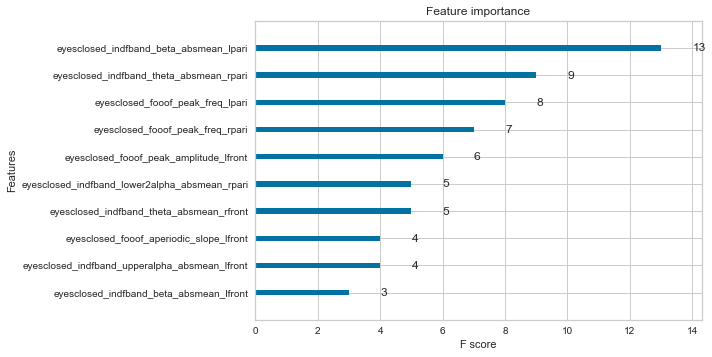

In [19]:
plot_importance(xgbr, max_num_features=10)
pyplot.show()

# Random Forest

In [20]:
random_forest = fit_random_forest_with_grid_search(X_train, y_train)

# parameters = {'max_depth':[10, 15, 20, 25, 30], 
#                   'n_estimators' :[1000],
#                   'min_samples_split':[2, 3, 5],
#                   'max_leaf_nodes':[100, 150, 200, 250]}

Best parameters for Random Forest: {'max_depth': 10, 'max_leaf_nodes': 100, 'min_samples_split': 3, 'n_estimators': 1000}


In [21]:
random_forest.best_score_

-9.239559909850104

In [22]:
test_mse_rf = sklearn.metrics.mean_squared_error(y_test , random_forest.predict(X_test))
print('TEST MSE = ', test_mse_rf)

TEST MSE =  5.603906916275229


# SVR

In [31]:
from sklearn import svm
svr= svm.SVR()
parameters = {'kernel' : ( 'rbf' , 'poly', 'linear', 'sigmoid' ), 'C':[0.1, 1,10,100], 'gamma':['auto', 10e-2, 10e-1, 1, 2]}
clf = GridSearchCV(svr, parameters ,cv =5, scoring='neg_mean_squared_error')
clf.fit(X_train , y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['auto', 0.1, 1.0, 1, 2],
                         'kernel': ('rbf', 'poly', 'linear', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [32]:
print(clf.best_estimator_)
best_param = clf.best_params_
print("Best score = " , clf.best_score_)
print("Best param = " , best_param)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Best score =  -9.261006037157061
Best param =  {'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}


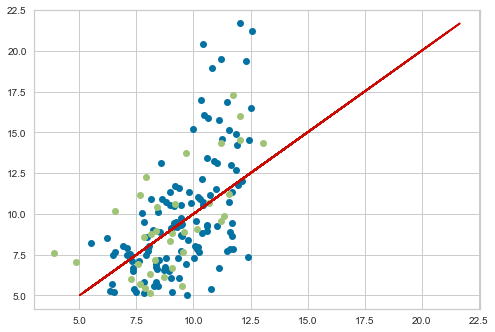

In [33]:
plt.plot(clf.predict(X_train) , y_train , 'o')
plt.plot(clf.predict(X_test), y_test , 'o')
plt.plot(y_train , y_train)

In [34]:
svr_final = svm.SVR(kernel = best_param['kernel'] , C = best_param['C'])
svr_final.fit(X_train , y_train)
test_mse_svm = sklearn.metrics.mean_squared_error(y_test , svr_final.predict(X_test))
print('TEST MSE = ', test_mse_svm)

TEST MSE =  6.11684694964348


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Gaussian Process

In [27]:
gpr = GaussianProcessRegressor(n_restarts_optimizer=5)
    
# Grid search
parameters = {
    'kernel': [RationalQuadratic(), RBF(), Matern(length_scale=1, nu=1.5),  DotProduct()], 'alpha': [1e-10, 1e-5, 1e-3, 1e-1, 1., 1.5, 2.]}
clf_gpr = GridSearchCV(gpr, parameters, scoring='neg_mean_squared_error', n_jobs=4, iid=False, cv=5)
clf_gpr.fit(X_train, y_train)
clf_gpr.best_params_

{'alpha': 1.0, 'kernel': Matern(length_scale=1, nu=1.5)}

In [28]:
clf_gpr.best_score_

-9.134815663860966

In [29]:
sklearn.metrics.mean_squared_error(y_test , clf_gpr.predict(X_test))

8.313110876919968

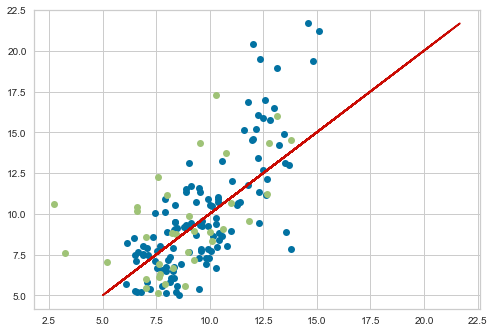

In [30]:
plt.plot(clf_gpr.predict(X_train) , y_train , 'o')
plt.plot(clf_gpr.predict(X_test), y_test , 'o')
plt.plot(y_train , y_train)